In [ ]:
%reset

In [2]:
pip install sentencepiece

  Obtaining dependency information for sentencepiece from https://files.pythonhosted.org/packages/49/0a/2fe387f825ac5aad5a0bfe221904882106cac58e1b693ba7818785a882b6/sentencepiece-0.2.0-cp312-cp312-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/dpeleg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dpeleg/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dpeleg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/dpeleg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# import pandas as pd
# import numpy as np
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
#
# # Load the fake news corpus dataset
# root_dir = "/Users/dpeleg/local/nltk_data/fake-news"
# file_name = "FakeNewsNet.csv"
# df = pd.read_csv(f"{root_dir}/{file_name}")


In [8]:

# # Initialize the lemmatizer
# lemmatizer = WordNetLemmatizer()
#
# # Define a function to preprocess the text data
# def preprocess_text(text):
#     # Tokenize the text
#     tokens = word_tokenize(text)
#
#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     tokens = [token for token in tokens if token.lower() not in stop_words]
#
#     # Lemmatize the tokens
#     tokens = [lemmatizer.lemmatize(token) for token in tokens]
#
#     # Join the tokens back into a string
#     text = ' '.join(tokens)
#
#     return text



In [46]:
# # Apply the preprocessing function to the text data
# df['text'] = df['text'].apply(preprocess_text)
#
# # Save the preprocessed data to a new CSV file
# df.to_csv('preprocessed_fake_news_corpus.csv', index=False)

In [38]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

tokenizer = word_tokenize('hello world', language='english')

# Load the LIAR dataset
root_dir = "/Users/dpeleg/local/fake_dataset/liar"
# file_name = "train2.tsv"
file_name = "test2.tsv"

# Define the column names
column_names = ['rec_id', 'id', 'label', 'statement', 'subject', 'speaker', 'job title', 'state', 'party', 'true', 'false', 'half', 'mostly', 'pants-fire', 'context', 'justification']

df = pd.read_csv(f"{root_dir}/{file_name}", delimiter='\t', names=column_names)
# df = pd.read_csv('liar_train.csv')

# Describe the dataset
# print(df.describe())
# Print the top 3 lines of the dataset
print(df.columns)
print(df.head(1))




Index(['rec_id', 'id', 'label', 'statement', 'subject', 'speaker', 'job title',
       'state', 'party', 'true', 'false', 'half', 'mostly', 'pants-fire',
       'context', 'justification'],
      dtype='object')
   rec_id          id label  \
0       0  11972.json  true   

                                           statement      subject     speaker  \
0  Building a wall on the U.S.-Mexico border will...  immigration  rick-perry   

  job title  state       party  true  false  half  mostly  pants-fire  \
0  Governor  Texas  republican    30     30    42      23          18   

           context                                      justification  
0  Radio interview  Meantime, engineering experts agree the wall w...  


In [39]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
#
# # Define a function to preprocess the text data
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token.lower() not in stop_words]

        # Lemmatize the tokens
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Join the tokens back into a string
        text = ' '.join(tokens)

        return text
    else:
        return ''  # Return an empty string for non-string inputs
#

In [40]:
# import nltk
# nltk.data.path.append('/Users/dpeleg/local/nltk_data/tokenizers')

# Apply the preprocessing function to the statement column
df['statement'] = df['statement'].apply(preprocess_text)

# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_liar_train.csv', index=False)

# BERT Embedding

In [41]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

In [42]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [44]:
def generate_bert_embeddings(texts):
    # Create a list to store the embeddings
    embeddings = []

    print(f'Generating BERT embeddings using tokenizer: {tokenizer.__class__.__name__}')

    i = 0
    # Iterate over the input texts
    for text in texts:
        i += 1
        if i % 1000 == 0:
            print(f"Completed {i} loops in function")
        # Tokenize the text using the BERT tokenizer
        inputs = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=512,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        # Get the input IDs and attention mask
        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']

        # Zero the gradients
        model.zero_grad()

        # Forward pass through the BERT model
        outputs = model(input_ids, attention_mask=attention_mask)

        # Get the last hidden state (i.e., the embedding)
        embedding = outputs.last_hidden_state[:, 0, :]

        # Append the embedding to the list
        embeddings.append(embedding.detach().numpy())

    print(f"Completed {i} loops in function")
    # Return the list of embeddings
    return embeddings

In [45]:
import numpy as np

# Load the fake news dataset
df = pd.read_csv('preprocessed_liar_train.csv')

# Extract the article texts
statement = df['statement'].fillna('')

# Generate BERT embeddings for the article texts
embeddings = generate_bert_embeddings(statement)

# Convert the embeddings to a numpy array
embeddings_array = np.array(embeddings)

Generating BERT embeddings using tokenizer: BertTokenizer
Completed 1000 loops in function
Completed 1267 loops in function


# TSNE

In [46]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", Warning)  # Ignore all warnings

from sklearn.manifold import TSNE

# Remove dimension
embeddings_array = embeddings_array.squeeze()

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_array)

# Alternatively, you can also reduce dimensionality to 3D
# tsne = TSNE(n_components=3, random_state=42)
# embeddings_3d = tsne.fit_transform(embeddings_array)

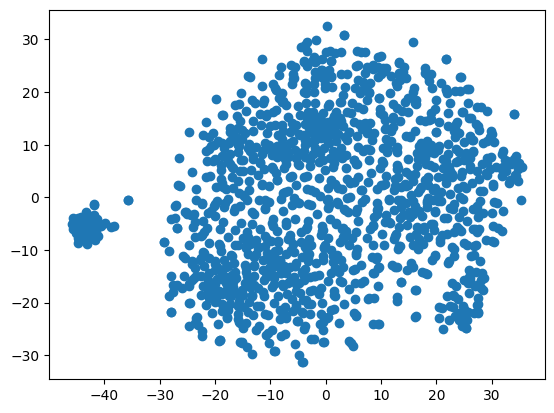

In [47]:
import matplotlib.pyplot as plt

# Visualize the 2D clusters
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.show()

# Alternatively, you can visualize the 3D clusters
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2])
# plt.show()

In [48]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", Warning)  # Ignore all warnings

from sklearn.manifold import TSNE

# 3D PLOT

# Remove dimension
# embeddings_array = embeddings_array.squeeze()

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings_array)

# Alternatively, you can also reduce dimensionality to 3D
# tsne = TSNE(n_components=3, random_state=42)
# embeddings_3d = tsne.fit_transform(embeddings_array)

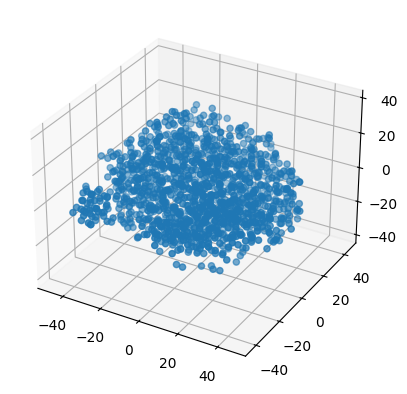

In [49]:
import matplotlib.pyplot as plt

# Visualize the 2D clusters
# plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
# plt.show()

# Alternatively, you can visualize the 3D clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2])
plt.show()

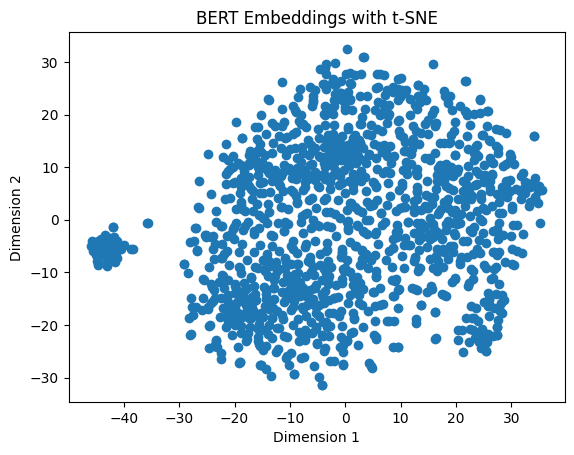

In [50]:
import matplotlib.pyplot as plt

# Visualize the 2D clusters
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title("BERT Embeddings with t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [51]:
from sklearn.metrics import silhouette_score

labels = df['label'].fillna('')
# Calculate the silhouette score for each sample
silhouette = silhouette_score(embeddings_2d, labels)

# Print the average silhouette score
print("Average silhouette score:", silhouette.mean())

Average silhouette score: -0.052732166


# Understanding Clusters

In [52]:
import pandas as pd

text_data = embeddings_2d[:, 0]
cluster_labels = embeddings_2d[:, 1]

# Create a DataFrame with the cluster labels and text data
df = pd.DataFrame({'cluster': cluster_labels, 'text': text_data})
# Group by cluster and calculate summary statistics
cluster_stats = df.groupby('cluster').agg({'text': ['mean', 'median', 'std']})
# Print the cluster stats
print(cluster_stats)

                 text               
                 mean     median std
cluster                             
-31.384720  -4.167595  -4.167595 NaN
-31.321251  -4.195101  -4.195101 NaN
-29.927198  -4.734666  -4.734666 NaN
-29.713091 -13.383946 -13.383946 NaN
-29.293077  -9.234487  -9.234487 NaN
...               ...        ...  ..
 29.616770  -3.398354  -3.398354 NaN
 29.865040  -1.814147  -1.814147 NaN
 30.863668   3.285795   3.285795 NaN
 30.889940   3.335505   3.335505 NaN
 32.472424   0.302128   0.302128 NaN

[1267 rows x 3 columns]


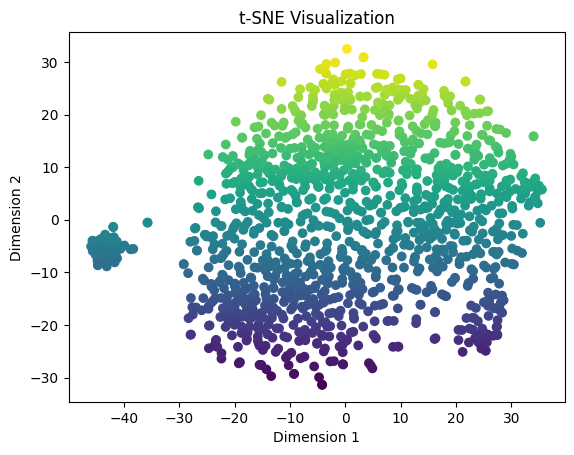

In [53]:
import matplotlib.pyplot as plt

# Create a scatter plot of the 2D data
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

In [54]:
import numpy as np

print(embeddings_2d.shape)
print(embeddings_2d[:, 0].dtype)
print(embeddings_array.shape)
print("Labels")
print (cluster_labels.shape)
print (cluster_labels.dtype)
print (cluster_labels.size)
#print(embeddings_2d.describe())
# Calculate summary statistics for each cluster
# for i in range(9):
#     cluster_data = embeddings_2d[cluster_labels == i]
#     print(f'Cluster {i+1}:')
#     print(f'Mean text length: {np.mean(cluster_data[:, 0])}')
#     print(f'Std dev text length: {np.std(cluster_data[:, 0])}')
#     print()

(1267, 2)
float32
(1267, 768)
Labels
(1267,)
float32
1267
